In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols as sm_ols
from statsmodels.iolib.summary2 import summary_col

pd.set_option(
    "display.max_colwidth", 1000, "display.max_rows", 100, "display.max_columns", None
)

In [51]:
celtics = pd.read_excel('nba.xlsx')
celtics = celtics.set_axis(celtics.iloc[0], axis=1).drop(index=0)

not_numbers = ['Date','Opponent','Home_Away','In Season Tournament','Win','Opp_Win_Last_Game']
bool_columns = ['In Season Tournament','Opp_Win_Last_Game','Win']

for col in celtics.columns:
    if col not in not_numbers:
        celtics[col] = pd.to_numeric(celtics[col])
    if col in bool_columns:
        celtics[col] = celtics[col].astype(bool)
    
celtics.head(5)

,Date,Opponent,Home_Away,In Season Tournament,Celtics_Win_Pct,Celtics_Home_Win_Pct,Celtics_Away_Win_Pct,Celtics_Win_Pct_Last_5_Games,Celtics_Win_Pct_Last_10_Games,Celtics_Avg_Points_Per_Game,Celtics_Avg_Points_Last_5_Games,Celtics_Avg_Points_Last_10_Games,Celtics_Avg_Off_Rating,Celtics_Avg_Off_Rating_Last_10_Games,Celtics_Avg_Def_Rating,Celtics_Avg_Def_Rating_Last_10_Games,Celtics_Avg_FG_Last_10_Games,Celtics_Avg_FG_Pct_Last_10_Games,Celtics_Avg_3P_Last_10_Games,Celtics_Avg_3P_Pct_Last_10_Games,Celtics_Avg_FT_Last_10_Games,Celtics_Avg_FT_Pct_Last_10_Games,Celtics_Rank_In_Conference,Celtics_Rank_In_Division,Celtics_Strength_Of_Key_Players_Missing,Opp_Win_Pct,Opp_Points_Last_Game,Opp_Win_Last_Game,Opp_FG_Last_Game,Opp_FG_Pct_Last_Game,Opp_3P_Last_Game,Opp_3P_Pct_Last_Game,Opp_FT_Last_Game,Opp_FT_Pct_Last_Game,Opp_Off_Rating_Last_Game,Opp_Def_Rating_Last_Game,Opp_Rank_In_Conference,Opp_Rank_In_Division,Opp_Strength_Of_Key_Players_Missing,Win,Celtics_Points,Opp_Points,Diff_Points,Total_Points,Over_Under
1,2023-10-25 00:00:00,New York Knicks,Away,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,True,108,104,4,212,223.0
2,2023-10-27 00:00:00,Miami Heat,Home,False,1.0,NaN,1.0,NaN,NaN,108.000000,NaN,NaN,114.400000,NaN,110.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0,1.000000,103.0,True,37.0,0.402,8.0,0.364,21.0,0.808,110.0,108.9,5.0,2.0,2,True,119,111,8,230,217.5
3,2023-10-30 00:00:00,Washington Wizards,Away,False,1.0,1.0,1.0,NaN,NaN,113.500000,NaN,NaN,117.100000,NaN,110.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0,0.500000,113.0,True,40.0,0.430,16.0,0.348,17.0,0.773,111.6,104.7,8.0,3.0,1,True,126,107,19,233,231.5
4,2023-11-01 00:00:00,Indiana Pacers,Home,False,1.0,1.0,1.0,NaN,NaN,117.666667,NaN,NaN,119.333333,NaN,108.966667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0,0.666667,105.0,False,36.0,0.409,12.0,0.261,21.0,0.840,100.0,103.5,2.0,1.0,4,True,155,104,51,259,233.5
5,2023-11-04 00:00:00,Brooklyn Nets,Away,False,1.0,1.0,1.0,NaN,NaN,127.000000,NaN,NaN,126.575000,NaN,106.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2,0.600000,109.0,True,44.0,0.458,18.0,0.400,3.0,0.600,100.0,115.5,4.0,3.0,5,True,124,114,10,238,227.5


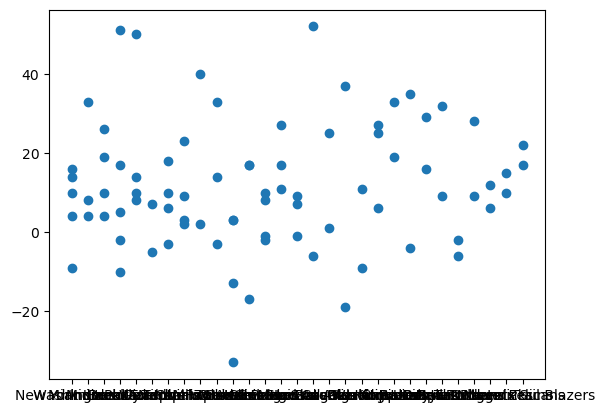

In [79]:
plt.scatter(x=celtics['Opponent'],y=celtics['Diff_Points'])

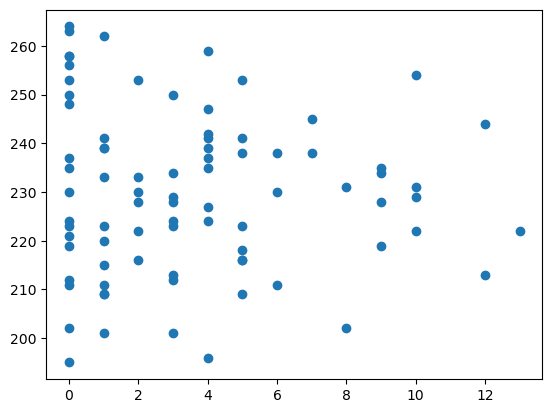

In [54]:
plt.scatter(x=celtics['Opp_Strength_Of_Key_Players_Missing'],y=celtics['Total_Points'])

In [68]:
results = sm_ols('Diff_Points ~ Home_Away', data=celtics).fit()
results_sum = results.summary()
results.rsquared

0.06256047314435609

## Best Individual Column

In [126]:
after_variables = ['Win','Celtics_Points','Opp_Points','Diff_Points','Total_Points']
bad_variables = ['Date','Opponent','Over_Under']
cant_use = after_variables + bad_variables

rsquared_values = {}
for col in celtics.columns:
    if col not in cant_use:
        formula = f'Diff_Points ~ Q("{col}")'
        results = sm_ols(formula, data=celtics).fit()
        rsquared_values[col] = results.rsquared

In [127]:
max(rsquared_values, key=rsquared_values.get)

'Opp_Rank_In_Conference'

In [128]:
colmn = max(rsquared_values, key=rsquared_values.get)
formula = f'Diff_Points ~ Q("{colmn}")'
print(f'R^2 for {colmn}:', sm_ols(formula, data=celtics).fit().rsquared)

R^2 for Opp_Rank_In_Conference: 0.09625387733213664


In [129]:
# rsquared_values

## Best Column with Opp_Rank_In_Conference

In [130]:
cant_use.append('Opp_Rank_In_Conference')

rsquared_values = {}
for col in celtics.columns:
    if col not in cant_use:
        formula = f'Diff_Points ~ Opp_Rank_In_Conference * Q("{col}")'
        results = sm_ols(formula, data=celtics).fit()
        rsquared_values[col] = results.rsquared

In [131]:
max(rsquared_values, key=rsquared_values.get)

'Celtics_Win_Pct'

In [132]:
colmn = max(rsquared_values, key=rsquared_values.get)
formula = f'Diff_Points ~ Opp_Rank_In_Conference * Q("{colmn}")'
print(f'Opp_Rank_In_Conference * {colmn}:', sm_ols(formula, data=celtics).fit().rsquared)

Opp_Rank_In_Conference * Celtics_Win_Pct: 0.18076433506511635


In [141]:
# rsquared_values

## Best Column with previous two

In [134]:
cant_use.append('Celtics_Avg_FT_Pct_Last_10_Games')

rsquared_values = {}
for col in celtics.columns:
    if col not in cant_use:
        formula = f'Diff_Points ~ Celtics_Win_Pct * Opp_Rank_In_Conference * Q("{col}")'
        results = sm_ols(formula, data=celtics).fit()
        rsquared_values[col] = results.rsquared

In [135]:
max(rsquared_values, key=rsquared_values.get)

'Celtics_Avg_FG_Pct_Last_10_Games'

In [138]:
colmn = max(rsquared_values, key=rsquared_values.get)
formula = f'Diff_Points ~ Celtics_Avg_FT_Pct_Last_10_Games * Opp_Rank_In_Conference * Q("{col}")'
print(f'Celtics_Avg_FT_Pct_Last_10_Games * Opp_Rank_In_Conference * {colmn}:', sm_ols(formula, data=celtics).fit().rsquared)

Celtics_Avg_FT_Pct_Last_10_Games * Opp_Rank_In_Conference * Celtics_Avg_FG_Pct_Last_10_Games: 0.2720003477883185


In [142]:
# rsquared_values

In [139]:
celtics['test_var'] = celtics['Celtics_Avg_FT_Pct_Last_10_Games'] * celtics['Opp_Rank_In_Conference'] * celtics['Celtics_Avg_FG_Pct_Last_10_Games']

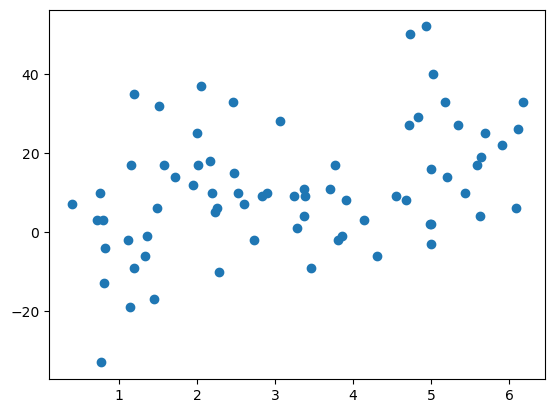

In [143]:
plt.scatter(x=celtics['test_var'],y=celtics['Diff_Points'])